In [ ]:
import tensorflow as tf

In [2]:
a = tf.placeholder('float')
b = tf.placeholder('float')

y = tf.multiply(a,b)

In [3]:
sess = tf.Session()

sess.run(y, feed_dict = {a: 3, b: 3})

9.0

# 2.1 Model about relation between each variables

## Linear Regression

In [28]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
num_points = 1000
vectors_set = []

In [9]:
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 +np.random.normal(0.0,0.03)
    vectors_set.append([x1,y1])

In [17]:
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

In [20]:
Data = pd.DataFrame({'x': x_data, 'y': y_data})

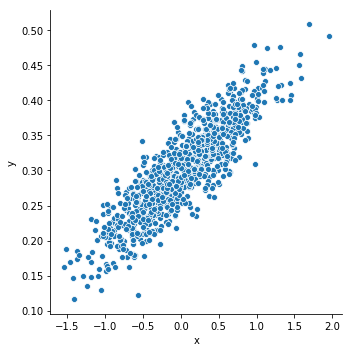

In [21]:
sns.relplot(x = 'x', y = 'y', data = Data)

# 2.2 Cost function and Gradient Descent algorithm

We make 'y_data = W * x_data + b'. Ofcourse, we know W is 0.1 and b is 0.3 but tensorflow don't know value.

#### Formula

In [22]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

#### Loss function

In [23]:
loss = tf.reduce_mean(tf.square(y - y_data))

#### Optimization algorithm

In [25]:
optimizer = tf.train.GradientDescentOptimizer(0.5)  # 0.5 is learning rate
train = optimizer.minimize(loss)  #optimizer is called by train

# 2.3 Run algorithm

In [34]:
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

In [35]:
for step in range(8):
    sess.run(train)
    
print(sess.run(W), sess.run(b))

[0.13124555] [0.299642]


No handles with labels found to put in legend.


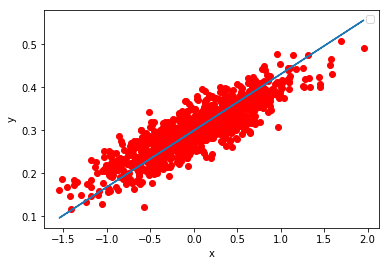

In [36]:
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Look detail process

In [37]:
for step in range(8):
    sess.run(train)
    print (step, sess.run(W), sess.run(b))

0 [0.12177046] [0.29963282]
1 [0.11517898] [0.2996264]
2 [0.11059353] [0.29962197]
3 [0.1074036] [0.29961887]
4 [0.10518448] [0.29961672]
5 [0.10364072] [0.2996152]
6 [0.10256679] [0.29961416]
7 [0.10181969] [0.29961345]


In [38]:
for step in range(8):
    sess.run(train)
    print(step, sess.run(loss))

0 0.0009102862
1 0.00091006455
2 0.00090995734
3 0.00090990553
4 0.0009098802
5 0.00090986816
6 0.0009098622
7 0.00090985943


No handles with labels found to put in legend.


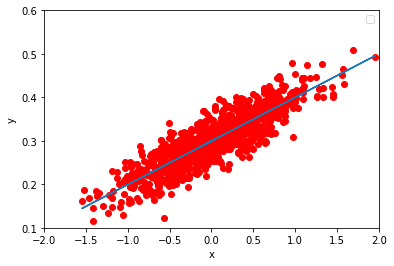

In [39]:
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
plt.xlabel('x')
plt.xlim(-2,2)
plt.ylim(0.1,0.6)
plt.ylabel('y')
plt.legend()
plt.show()